In [ ]:
# get stage riders

# for each rider, get tt score

# get LR ranking

# get results

# other rankings? bookmakers
# first time trial

# join

# plot
#course profile

# compare variance

In [33]:
import csv

In [27]:
# Take most likely startlist (finishers from stage 9)
from procyclingstats import Stage
from procyclingstats import Rider
stage = Stage("race/giro-d-italia/2025/stage-9")

In [36]:
stage_data = stage.parse()

In [37]:
#Remove unnecessary data
stage_data.pop("gc", None)
stage_data.pop("kom", None)
stage_data.pop("points", None)
stage_data.pop("teams", None)
stage_data.pop("youth", None)

stage_data

{'arrival': 'Siena',
 'avg_speed_winner': 42.566,
 'avg_temperature': 20.0,
 'climbs': [{'climb_name': 'La Cima', 'climb_url': 'location/la-cima'},
  {'climb_name': 'San Martino in Grania',
   'climb_url': 'location/san-martino-in-grania'}],
 'date': '2025-05-18',
 'departure': 'Gubbio',
 'distance': 181.0,
 'is_one_day_race': False,
 'pcs_points_scale': 'GT.B.Stage',
 'profile_icon': 'p3',
 'profile_score': 117,
 'race_category': 'ME - Men Elite',
 'race_startlist_quality_score': 946,
 'results': [{'rider_name': 'VAN AERT Wout',
   'rider_url': 'rider/wout-van-aert',
   'rider_number': 181,
   'team_name': 'Team Visma | Lease a Bike',
   'team_url': 'team/team-visma-lease-a-bike-2025',
   'rank': 1,
   'status': 'DF',
   'age': 30,
   'nationality': 'BE',
   'time': '4:15:08',
   'bonus': '0:00:14',
   'pcs_points': 80,
   'uci_points': 180.0},
  {'rider_name': 'DEL TORO Isaac',
   'rider_url': 'rider/isaac-del-toro',
   'rider_number': 204,
   'team_name': 'UAE Team Emirates - XRG',


In [31]:
#Get rider urls
rider_dict = {
    rider["rider_name"]: rider["rider_url"]
    for rider in stage_data.get("results", [])
    if rider.get("rank") is not None
}


In [ ]:
#Collect PCS points per speciality for Time trials
tt_rankings = {}

for rider_name, rider_url in rider_dict.items():
    rider = Rider(rider_url)
    pps = rider.points_per_speciality()
    time_trial_points = pps.get('time_trial', 0)  # Default to 0 if missing
    
    tt_rankings[rider_name] = {
        'rider_url': rider_url,
        'time_trial_points': time_trial_points
    }

tt_rankings
    

{'VAN AERT Wout': {'rider_url': 'rider/wout-van-aert',
  'time_trial_points': 3014},
 'DEL TORO Isaac': {'rider_url': 'rider/isaac-del-toro',
  'time_trial_points': 243},
 'CICCONE Giulio': {'rider_url': 'rider/giulio-ciccone',
  'time_trial_points': 117},
 'CARAPAZ Richard': {'rider_url': 'rider/richard-carapaz',
  'time_trial_points': 551},
 'YATES Simon': {'rider_url': 'rider/simon-yates', 'time_trial_points': 1205},
 'TIBERI Antonio': {'rider_url': 'rider/antonio-tiberi',
  'time_trial_points': 796},
 'AYUSO Juan': {'rider_url': 'rider/juan-ayuso-pesquera',
  'time_trial_points': 1193},
 'ARENSMAN Thymen': {'rider_url': 'rider/thymen-arensman',
  'time_trial_points': 1277},
 'BERNAL Egan': {'rider_url': 'rider/egan-bernal', 'time_trial_points': 596},
 'YATES Adam': {'rider_url': 'rider/adam-yates', 'time_trial_points': 1216},
 'PLANCKAERT Edward': {'rider_url': 'rider/edward-planckaert',
  'time_trial_points': 18},
 'MCNULTY Brandon': {'rider_url': 'rider/brandon-mcnulty',
  'time_

In [38]:
stage2 = Stage("race/giro-d-italia/2025/stage-2")

In [39]:
stage2_data = stage2.parse()

In [40]:
#Remove unnecessary data
stage2_data.pop("gc", None)
stage2_data.pop("kom", None)
stage2_data.pop("points", None)
stage2_data.pop("teams", None)
stage2_data.pop("youth", None)

[{'rider_name': 'VACEK Mathias',
  'rider_url': 'rider/mathias-vacek',
  'rider_number': 117,
  'team_name': 'Lidl - Trek',
  'team_url': 'team/lidl-trek-2025',
  'rank': 1,
  'prev_rank': 7,
  'time': '3:52:37',
  'age': 22,
  'nationality': 'CZ',
  'pcs_points': 0,
  'uci_points': 0},
 {'rider_name': 'AYUSO Juan',
  'rider_url': 'rider/juan-ayuso-pesquera',
  'rider_number': 201,
  'team_name': 'UAE Team Emirates - XRG',
  'team_url': 'team/uae-team-emirates-xrg-2025',
  'rank': 2,
  'prev_rank': 8,
  'time': '3:52:48',
  'age': 22,
  'nationality': 'ES',
  'pcs_points': 0,
  'uci_points': 0},
 {'rider_name': 'DEL TORO Isaac',
  'rider_url': 'rider/isaac-del-toro',
  'rider_number': 204,
  'team_name': 'UAE Team Emirates - XRG',
  'team_url': 'team/uae-team-emirates-xrg-2025',
  'rank': 3,
  'prev_rank': 6,
  'time': '3:52:49',
  'age': 21,
  'nationality': 'MX',
  'pcs_points': 0,
  'uci_points': 0},
 {'rider_name': 'POOLE Max',
  'rider_url': 'rider/max-poole',
  'rider_number': 16

In [41]:
# Loop through the results of the second stage and add tt results to existing set
for result in stage2_data.get('results', []):
    rider_name = result.get('rider_name')
    rank = result.get('rank')

    if rider_name in tt_rankings and rank is not None:
        tt_rankings[rider_name]['stage_2_ranking'] = rank

In [151]:
# FOR STAGE 10 when complete
stage_10 = Stage("race/giro-d-italia/2025/stage-10")
stage_10_data = stage_10.parse()
#Remove unnecessary data
stage_10_data.pop("gc", None)
stage_10_data.pop("kom", None)
stage_10_data.pop("points", None)
stage_10_data.pop("teams", None)
stage_10_data.pop("youth", None)

[{'rider_name': 'DEL TORO Isaac',
  'rider_url': 'rider/isaac-del-toro',
  'rider_number': 204,
  'team_name': 'UAE Team Emirates - XRG',
  'team_url': 'team/uae-team-emirates-xrg-2025',
  'rank': 1,
  'prev_rank': 1,
  'time': '34:11:37',
  'age': 21,
  'nationality': 'MX',
  'pcs_points': 0,
  'uci_points': 0},
 {'rider_name': 'AYUSO Juan',
  'rider_url': 'rider/juan-ayuso-pesquera',
  'rider_number': 201,
  'team_name': 'UAE Team Emirates - XRG',
  'team_url': 'team/uae-team-emirates-xrg-2025',
  'rank': 2,
  'prev_rank': 2,
  'time': '34:12:02',
  'age': 22,
  'nationality': 'ES',
  'pcs_points': 0,
  'uci_points': 0},
 {'rider_name': 'TIBERI Antonio',
  'rider_url': 'rider/antonio-tiberi',
  'rider_number': 31,
  'team_name': 'Bahrain - Victorious',
  'team_url': 'team/bahrain-victorious-2025',
  'rank': 3,
  'prev_rank': 3,
  'time': '34:12:38',
  'age': 23,
  'nationality': 'IT',
  'pcs_points': 0,
  'uci_points': 0},
 {'rider_name': 'VACEK Mathias',
  'rider_url': 'rider/mathia

In [152]:
# Loop through the results of the second stage and add tt results to existing set
for result in stage_10_data.get('results', []):
    rider_name = result.get('rider_name')
    rank = result.get('rank')

    if rider_name in tt_rankings and rank is not None:
        tt_rankings[rider_name]['stage_10_ranking'] = rank

In [153]:
tt_rankings

{'VAN AERT Wout': {'rider_url': 'rider/wout-van-aert',
  'time_trial_points': 3014,
  'stage_2_ranking': 34,
  'stage_10_ranking': 16},
 'DEL TORO Isaac': {'rider_url': 'rider/isaac-del-toro',
  'time_trial_points': 243,
  'stage_2_ranking': 12,
  'stage_10_ranking': 36},
 'CICCONE Giulio': {'rider_url': 'rider/giulio-ciccone',
  'time_trial_points': 117,
  'stage_2_ranking': 40,
  'stage_10_ranking': 57},
 'CARAPAZ Richard': {'rider_url': 'rider/richard-carapaz',
  'time_trial_points': 551,
  'stage_2_ranking': 32,
  'stage_10_ranking': 59},
 'YATES Simon': {'rider_url': 'rider/simon-yates',
  'time_trial_points': 1205,
  'stage_2_ranking': 26,
  'stage_10_ranking': 23},
 'TIBERI Antonio': {'rider_url': 'rider/antonio-tiberi',
  'time_trial_points': 796,
  'stage_2_ranking': 18,
  'stage_10_ranking': 26},
 'AYUSO Juan': {'rider_url': 'rider/juan-ayuso-pesquera',
  'time_trial_points': 1193,
  'stage_2_ranking': 10,
  'stage_10_ranking': 22},
 'ARENSMAN Thymen': {'rider_url': 'rider/th

In [154]:
# Write to csv
with open('../data/giro_2025_tt/pcs_time_trial_points.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['rider', 'rider_url', 'pcs_time_trial_points', 'stage_2_ranking','stage_10_ranking'])
    writer.writeheader()

    for rider_name, data in tt_rankings.items():
        writer.writerow({
            'rider': rider_name,
            'rider_url': data['rider_url'],
            'pcs_time_trial_points': data['time_trial_points'],
            'stage_2_ranking': data['stage_2_ranking'],
            'stage_10_ranking': data['stage_10_ranking']
        })

In [155]:
# Get LR rankings

import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 1) Fetch nonce
page = requests.get("https://lanternerouge.com/individual-time-trial-ranking/")
soup = BeautifulSoup(page.text, "html.parser")

# Try table data-attribute first
table = soup.find("table", id=re.compile(r"footable_\d+"))
nonce = table.get("data-ninja_table_public_nonce") if table else None

# Fallback: search scripts
if not nonce:
    for script in soup.find_all("script"):
        txt = script.string or ""
        m = re.search(r"""['"]?ninja_table_public_nonce['"]?\s*[:,=]\s*['"]([0-9a-fA-F]+)['"]""", txt)
        if m:
            nonce = m.group(1)
            break
if not nonce:
    raise RuntimeError("Couldn’t find ninja_table_public_nonce")

# 2) Hit AJAX “get-all-data”
resp = requests.get(
    "https://lanternerouge.com/wp-admin/admin-ajax.php",
    params={
        "action":                   "wp_ajax_ninja_tables_public_action",
        "table_id":                 "15007",
        "target_action":            "get-all-data",
        "default_sorting":          "old_first",
        "skip_rows":                "0",
        "limit_rows":               "0",
        "ninja_table_public_nonce": nonce,
    }
)
resp.raise_for_status()
rows = [item["value"] for item in resp.json()]

# 3) Normalize
df = pd.json_normalize(rows)
print("Raw columns:", df.columns.tolist())

# 4) Rename
df = df.rename(columns={
    "rank":"lr_rank",
    "ninja_column_3": "Team",
    "t25rate":        "Pct25Time",
    "winscore":       "WinScore",
})

# 5) Convert types, one by one
df["lr_rank"] = df["lr_rank"].astype(int)
df["rating"] = df["rating"].str.rstrip("%").astype(float).div(100)
df["Pct25Time"] = df["Pct25Time"].str.rstrip("%").astype(float).div(100)
df["WinScore"]  = df["WinScore"].str.rstrip("%").astype(float).div(100)

# Optional: reorder columns, save
df = df[["lr_rank", "rider", "Team", "rating", "Pct25Time", "WinScore"]]
df.to_csv("tt_ranking_full.csv", index=False)

print(df.head())


Raw columns: ['rank', 'rider', 'ninja_column_3', 'rating', 'winscore', 't25rate', '___id___']
   lr_rank            rider               Team  rating  Pct25Time  WinScore
0        1  Evenepoel Remco  Soudal Quick-Step   0.969        1.0      0.96
1        2   Tarling Joshua   INEOS Grenadiers   0.941        1.0      0.93
2        3    Ganna Filippo   INEOS Grenadiers   0.888        1.0      0.85
3        4      Kung Stefan       Groupama-FDJ   0.749        1.0      0.65
4        5    Pogacar Tadej  UAE Team Emirates   0.736        1.0      0.58


In [156]:
df.to_csv("../data/giro_2025_tt/LR_rankings.csv", index=False)

In [157]:
#Import all data

lr_df = df
pcs_df = pd.read_csv("../data/giro_2025_tt/pcs_time_trial_points.csv")
oc_df = pd.read_csv("../data/giro_2025_tt/oddschecker_rankings.csv")

print(pcs_df.head())

             rider              rider_url  pcs_time_trial_points  \
0    VAN AERT Wout    rider/wout-van-aert                   3014   
1   DEL TORO Isaac   rider/isaac-del-toro                    243   
2   CICCONE Giulio   rider/giulio-ciccone                    117   
3  CARAPAZ Richard  rider/richard-carapaz                    551   
4      YATES Simon      rider/simon-yates                   1205   

   stage_2_ranking  stage_10_ranking  
0               34                16  
1               12                36  
2               40                57  
3               32                59  
4               26                23  


In [100]:
lr_df.head(20)

,lr_rank,rider,Team,rating,Pct25Time,WinScore
0,1,Evenepoel Remco,Soudal Quick-Step,0.969,1.000,0.96
1,2,Tarling Joshua,INEOS Grenadiers,0.941,1.000,0.93
2,3,Ganna Filippo,INEOS Grenadiers,0.888,1.000,0.85
3,4,Kung Stefan,Groupama-FDJ,0.749,1.000,0.65
4,5,Pogacar Tadej,UAE Team Emirates,0.736,1.000,0.58
5,6,Roglic Primoz,BORA-hansgrohe,0.720,1.000,0.64
6,7,Vingegaard Jonas,Team Visma | Lease a Bike,0.684,1.000,0.66
7,8,van Aert Wout,Team Visma | Lease a Bike,0.671,0.889,0.57
8,9,Foss Tobias,INEOS Grenadiers,0.658,1.000,0.61
9,10,Ayuso Juan,UAE Team Emirates,0.651,1.000,0.61


In [101]:
pcs_df.loc[pcs_df['rider']=='PIDCOCK Thomas']

,rider,rider_url,pcs_time_trial_points,stage_2_ranking
14,PIDCOCK Thomas,rider/thomas-pidcock,137,39


In [158]:
import unicodedata

def normalize_name(name: str, swap_surname_first: bool = False) -> str:
    """
    1) strip & lowercase
    2) remove accents/diacritics
    3) optionally swap “surname firstname” → “firstname surname”
    """
    # 1) strip & lowercase
    name = name.strip().lower()

    # 2) de‑accent
    name = unicodedata.normalize("NFKD", name)
    name = "".join(ch for ch in name if not unicodedata.combining(ch))

    # 3) swap surname–firstname if needed
    if swap_surname_first:
        parts = name.split()
        if len(parts) > 1:
            firstname = parts[-1]
            surname   = " ".join(parts[:-1])
            name = f"{firstname} {surname}"

    
    

    return name




In [159]:
# df1 has “firstname surname” already
oc_df["norm_name"] = oc_df["rider"].apply(lambda x: normalize_name(x, swap_surname_first=False))

# df2 & df3 have “surname firstname”
for df in (lr_df, pcs_df):
    df["norm_name"] = df["rider"].apply(lambda x: normalize_name(x, swap_surname_first=True))



In [160]:
rename_map = {
    "luke plapp":               "lucas plapp",
    "mikel azparren xabier":    "xabier mikel azparren",
    "felipe martinez daniel":   "daniel martinez",
    "alex edmondson":           "alexander edmondson",
    "thomas pidcock":           "tom pidcock",
    "smith rivera brandon":     "brandon rivera",
    "frølich honore mikkel":    "mikkel honore",
    "erik bystrøm sven":        "sven erik bystrom",
    "rafał majka":              "rafal majka",
}

In [140]:
pcs_df

,rider,rider_url,pcs_time_trial_points,stage_2_ranking,norm_name
0,VAN AERT Wout,rider/wout-van-aert,3014,34,wout van aert
1,DEL TORO Isaac,rider/isaac-del-toro,243,12,isaac del toro
2,CICCONE Giulio,rider/giulio-ciccone,117,40,giulio ciccone
3,CARAPAZ Richard,rider/richard-carapaz,551,32,richard carapaz
4,YATES Simon,rider/simon-yates,1205,26,simon yates
...,...,...,...,...,...
166,TORRES Albert,rider/albert-torres,75,174,albert torres
167,HAMILTON Lucas,rider/lucas-hamilton,84,122,lucas hamilton
168,AULAR Orluis,rider/orluis-aular,539,47,orluis aular
169,DOUBLE Paul,rider/paul-double,4,64,paul double


In [161]:
#Unify naming 
pcs_df["norm_name"] = pcs_df["norm_name"].replace(rename_map)
pcs_df.loc[pcs_df['norm_name']=='tom pidcock']

,rider,rider_url,pcs_time_trial_points,stage_2_ranking,stage_10_ranking,norm_name
14,PIDCOCK Thomas,rider/thomas-pidcock,137,39,42,tom pidcock


In [113]:
lr_df

,lr_rank,rider,Team,rating,Pct25Time,WinScore,norm_name
0,1,Evenepoel Remco,Soudal Quick-Step,0.969,1.0,0.96,remco evenepoel
1,2,Tarling Joshua,INEOS Grenadiers,0.941,1.0,0.93,joshua tarling
2,3,Ganna Filippo,INEOS Grenadiers,0.888,1.0,0.85,filippo ganna
3,4,Kung Stefan,Groupama-FDJ,0.749,1.0,0.65,stefan kung
4,5,Pogacar Tadej,UAE Team Emirates,0.736,1.0,0.58,tadej pogacar
...,...,...,...,...,...,...,...
410,411,van der Tuuk Axel,,0.000,1.0,0.27,axel van der tuuk
411,412,Watson Sam,Groupama-FDJ,0.000,1.0,0.48,sam watson
412,413,Carboni Giovanni,,0.000,1.0,0.01,giovanni carboni
413,414,Megens Brian,,0.000,1.0,0.32,brian megens


In [162]:
pcs_df.loc[pcs_df['rider']=='PIDCOCK Thomas']

,rider,rider_url,pcs_time_trial_points,stage_2_ranking,stage_10_ranking,norm_name
14,PIDCOCK Thomas,rider/thomas-pidcock,137,39,42,tom pidcock


In [163]:
# Now merge/join on norm_name
merged = (
    pcs_df.set_index("norm_name")
        .join(oc_df.set_index("norm_name"), how="outer", rsuffix="_3")
        .join(lr_df.set_index("norm_name"), how="left", rsuffix="_2")
       .reset_index()
)
merged

,norm_name,rider,rider_url,pcs_time_trial_points,stage_2_ranking,stage_10_ranking,rider_3,odds,odds_rank,lr_rank,rider_2,Team,rating,Pct25Time,WinScore
0,adam yates,YATES Adam,rider/adam-yates,1216,28,41,Adam Yates,600,31.0,47.0,Yates Adam,UAE Team Emirates,0.328,0.700,0.30
1,afonso eulalio,EULÁLIO Afonso,rider/afonso-eulalio,0,92,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,albert torres,TORRES Albert,rider/albert-torres,75,174,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alessandro tonelli,TONELLI Alessandro,rider/alessandro-tonelli,14,69,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,alessandro verre,VERRE Alessandro,rider/alessandro-verre,39,37,112,Alessandro Verre,1500,71.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,wilco kelderman,KELDERMAN Wilco,rider/wilco-kelderman,2699,25,60,Wilco Kelderman,750,37.0,121.0,Kelderman Wilco,Team Visma | Lease a Bike,0.146,0.500,0.12
167,wout poels,POELS Wout,rider/wout-poels,916,66,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,wout van aert,VAN AERT Wout,rider/wout-van-aert,3014,34,16,Wout Van Aert,14,4.0,8.0,van Aert Wout,Team Visma | Lease a Bike,0.671,0.889,0.57
169,xabier mikel azparren,AZPARREN Xabier Mikel,rider/xabier-mikel-azparren-irurzun,267,24,10,Xabier Mikel Azparren,150,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# PCS: highest num → rank 1, next distinct → rank 2, etc.
ranks = merged["pcs_time_trial_points"].rank(
    method="dense",   # or "min", "average", etc.
    ascending=False
)
merged["pcs_rank"] = ranks.astype("Int64")

In [171]:
# dense ranking: highest point → rank 1, next distinct → rank 2, etc.
ranks = merged["lr_rank"].rank(
    method="dense",   # or "min", "average", etc.
    ascending=True
)
merged["lr_dense_rank"] = ranks.astype("Int64")

In [172]:
# Calculate +/- for each ranking

merged['lr_diff'] = merged['lr_dense_rank'] - merged['stage_10_ranking']
merged['pcs_diff'] = merged['pcs_rank'] - merged['stage_10_ranking']
merged['oc_diff'] = merged['odds_rank'] - merged['stage_10_ranking']
merged['s2_diff'] = merged['stage_2_ranking'] - merged['stage_10_ranking']

In [174]:
pd.options.display.float_format = '{:+,.0f}'.format

In [175]:
merged
# current race results

,norm_name,rider,rider_url,pcs_time_trial_points,stage_2_ranking,stage_10_ranking,rider_3,odds,odds_rank,lr_rank,...,rating,Pct25Time,WinScore,pcs_rank,lr_rdense_rank,lr_dense_rank,lr_diff,pcs_diff,oc_diff,s2_diff
0,adam yates,YATES Adam,rider/adam-yates,1216,28,41,Adam Yates,600,+31,+47,...,+0,+1,+0,22,15,15,-26,-19,-10,-13
1,afonso eulalio,EULÁLIO Afonso,rider/afonso-eulalio,0,92,150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,133,<NA>,<NA>,<NA>,-17,NaN,-58
2,albert torres,TORRES Albert,rider/albert-torres,75,174,167,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,96,<NA>,<NA>,<NA>,-71,NaN,7
3,alessandro tonelli,TONELLI Alessandro,rider/alessandro-tonelli,14,69,56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,123,<NA>,<NA>,<NA>,67,NaN,13
4,alessandro verre,VERRE Alessandro,rider/alessandro-verre,39,37,112,Alessandro Verre,1500,+71,NaN,...,NaN,NaN,NaN,108,<NA>,<NA>,<NA>,-4,-41,-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,wilco kelderman,KELDERMAN Wilco,rider/wilco-kelderman,2699,25,60,Wilco Kelderman,750,+37,+121,...,+0,+0,+0,4,31,31,-29,-56,-23,-35
167,wout poels,POELS Wout,rider/wout-poels,916,66,80,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29,<NA>,<NA>,<NA>,-51,NaN,-14
168,wout van aert,VAN AERT Wout,rider/wout-van-aert,3014,34,16,Wout Van Aert,14,+4,+8,...,+1,+1,+1,3,3,3,-13,-13,-12,18
169,xabier mikel azparren,AZPARREN Xabier Mikel,rider/xabier-mikel-azparren-irurzun,267,24,10,Xabier Mikel Azparren,150,+18,NaN,...,NaN,NaN,NaN,54,<NA>,<NA>,<NA>,44,+8,14


In [179]:
merged[merged['stage_10_ranking']==50]

,norm_name,rider,rider_url,pcs_time_trial_points,stage_2_ranking,stage_10_ranking,rider_3,odds,odds_rank,lr_rank,...,rating,Pct25Time,WinScore,pcs_rank,lr_rdense_rank,lr_dense_rank,lr_diff,pcs_diff,oc_diff,s2_diff
78,james knox,KNOX James,rider/james-knox,52,80,50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,105,<NA>,<NA>,<NA>,55,NaN,30


In [ ]:
#Take top 50 stage 10 results
merged = merged[merged['stage_10_ranking']<= 50 ]

In [177]:
merged.to_csv('../data/giro_2025_tt/merged.csv', index=False)

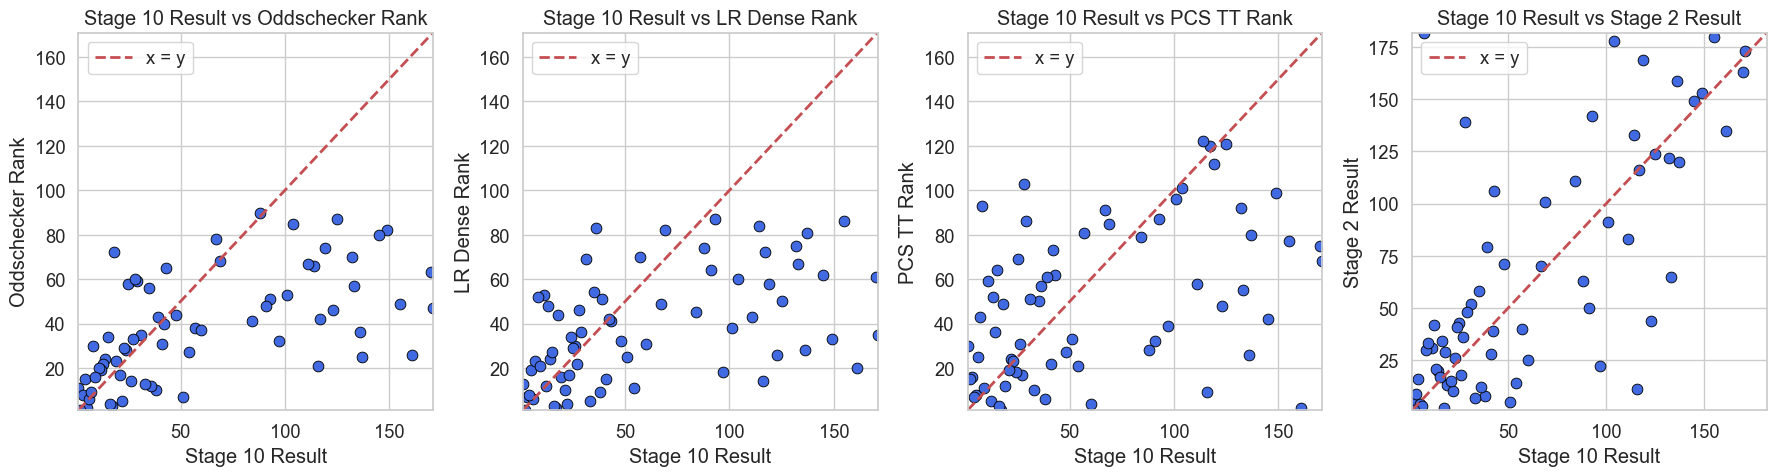

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume merged DataFrame has columns: 'stage_2_ranking', 'odds_rank', 'lr_rdense_rank', 'pcs_rank'
# Drop rows with missing rankings to avoid plotting errors
plot_df = merged.dropna(subset=['stage_2_ranking', 'stage_10_ranking', 'odds_rank', 'lr_rdense_rank', 'pcs_rank'])

# Set up plot style
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(18, 5))

# Define pairs for plotting
rank_pairs = [
    ('odds_rank', 'Oddschecker Rank'),
    ('lr_rdense_rank', 'LR Dense Rank'),
    ('pcs_rank', 'PCS TT Rank'),
    ('stage_2_ranking', 'Stage 2 Result')
]

for i, (col, label) in enumerate(rank_pairs, 1):
    plt.subplot(1, 4, i)
    # Scatter plot
    sns.scatterplot(
        x=plot_df['stage_10_ranking'],
        y=plot_df[col],
        s=60,
        color='royalblue',
        edgecolor='black'
    )
    # Plot x=y line
    min_rank = int(min(plot_df['stage_10_ranking'].min(), plot_df[col].min()))
    max_rank = int(max(plot_df['stage_10_ranking'].max(), plot_df[col].max()))
    plt.plot([min_rank, max_rank], [min_rank, max_rank], 'r--', lw=2, label='x = y')
    plt.xlabel('Stage 10 Result')
    plt.ylabel(label)
    plt.title(f'Stage 10 Result vs {label}')
    plt.xlim(min_rank, max_rank)
    plt.ylim(min_rank, max_rank)
    plt.legend()

plt.tight_layout()
plt.show()